# Clustering

In [19]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [20]:
data = pd.read_csv('./insurance.csv')

a) Clustering

Centroids of clusters:
         age       bmi  children   charges
0 -0.841847 -0.301513 -0.527018 -0.582400
1  0.829587  0.337019 -0.455656  0.643525
2  0.058439 -0.032266  1.336582 -0.052381

Cluster sizes:
 cluster
0    498
1    480
2    360
Name: count, dtype: int64

Smokers and non-smokers in each cluster:
 smoker    no  yes
cluster          
0        443   55
1        323  157
2        298   62


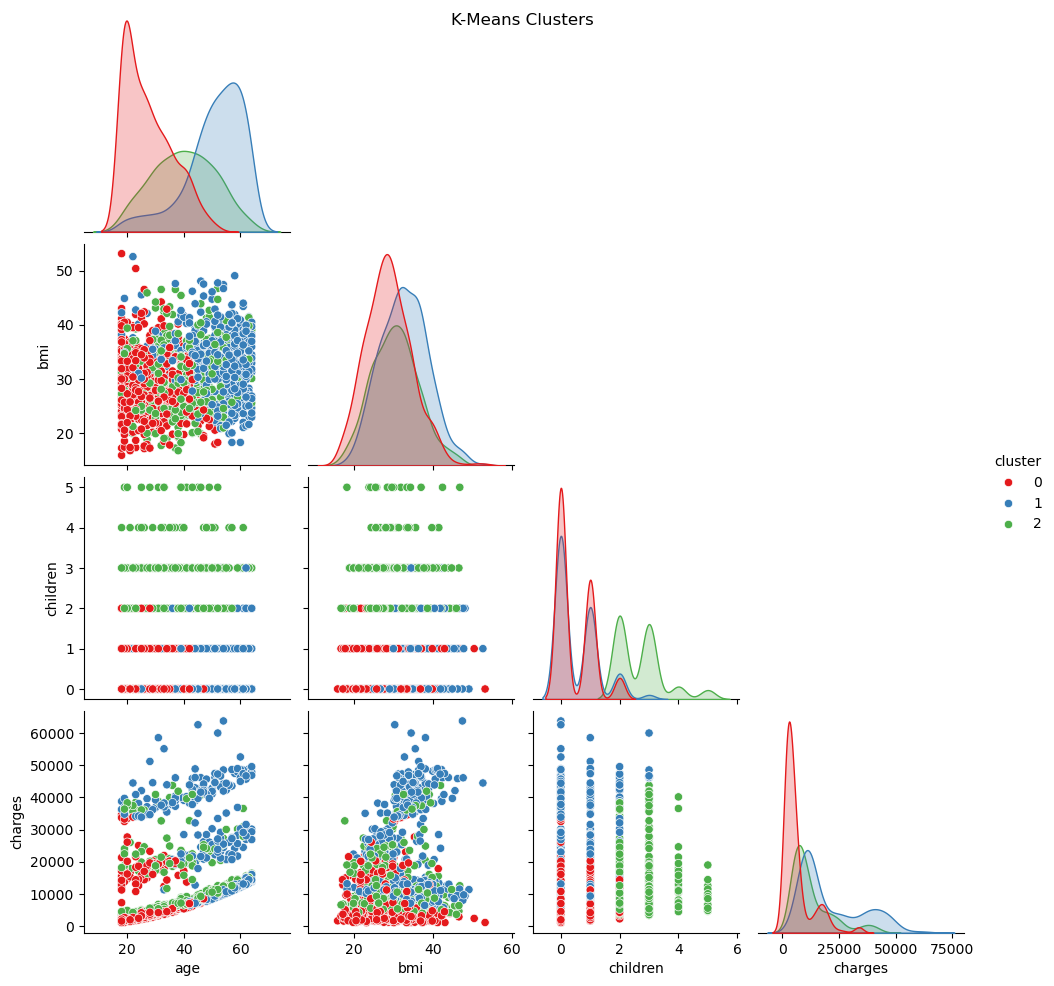

In [21]:
# Select features and standardize them
features = ['age', 'bmi', 'children', 'charges']
X = data[features]
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(
    n_clusters = 3, 
    init = 'k-means++', 
    random_state = 42
)
data['cluster'] = kmeans.fit_predict(X_scale)

# Centroids for the three clusters
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=features)
print("Centroids of clusters:\n", centroids)

# Cluster sizes
cluster_sizes = data['cluster'].value_counts().sort_index()
print("\nCluster sizes:\n", cluster_sizes)

# Number of smokers and non-smokers in each cluster
smoker_counts = data.groupby('cluster')['smoker'].value_counts().unstack(fill_value=0)
print("\nSmokers and non-smokers in each cluster:\n", smoker_counts)

# Pairplot visualization
sns.pairplot(data, vars=features, hue='cluster', palette='Set1', corner=True)
plt.suptitle("K-Means Clusters")
plt.show()

df = pd.read_csv("insurance.csv")

# Select features
features = ["age", "bmi", "children", "charges"]
X = df[features]